In [1]:
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys


import re

from sklearn.cluster import DBSCAN


from deep_generalizability.nets import Nets
from deep_generalizability.utils import *
from deep_generalizability.postprocessing.postprocessing import *
from deep_generalizability.postprocessing.stats_plotting import *
from deep_generalizability.save_load import *

from deep_generalizability.postprocessing.sharpness_measures import *
from deep_generalizability.postprocessing.stats_plotting import *

from deep_generalizability.data_getters import *

%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (13,9)


In [52]:
root_folder = os.environ["PATH_TO_DEEP_FOLDER"]
data_name = "gaussian"
exp = "Aug23_15-19-03_Daniels-MacBook-Pro-4.local"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [53]:
stats_df = get_end_stats(experiment_folder)


In [54]:
stats_df.sort_values(by="Acc Test Max", ascending=False)

,Acc Gap Mean,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Loss Test Max,Loss Test Mean,Loss Test Min,Loss Train Max,Loss Train Mean,Loss Train Min,Norm Max,Norm Mean,Norm Min,learning_rate
1598188755.862463,0.028667,0.653333,0.653333,0.653333,0.624667,0.624667,0.624667,0.786529,0.786529,0.786529,0.828892,0.828892,0.828892,1.456919,1.456919,1.456919,0.0464159
1598188756.152311,0.025333,0.650000,0.650000,0.650000,0.624667,0.624667,0.624667,0.785813,0.785813,0.785813,0.828758,0.828758,0.828758,1.459761,1.459761,1.459761,0.016681
1598188755.871039,0.028000,0.650000,0.650000,0.650000,0.622000,0.622000,0.622000,0.789253,0.789253,0.789253,0.830422,0.830422,0.830422,1.345826,1.345826,1.345826,0.00215443
1598188755.865429,0.028000,0.650000,0.650000,0.650000,0.622000,0.622000,0.622000,0.785587,0.785587,0.785587,0.828742,0.828742,0.828742,1.456215,1.456215,1.456215,0.00599484
1598188755.92457,0.020000,0.646667,0.646667,0.646667,0.626667,0.626667,0.626667,0.789956,0.789956,0.789956,0.830084,0.830084,0.830084,1.443232,1.443232,1.443232,0.129155
1598188755.858232,0.013333,0.643333,0.643333,0.643333,0.630000,0.630000,0.630000,0.801623,0.801623,0.801623,0.836628,0.836628,0.836628,1.457240,1.457240,1.457240,0.359381
1598188755.8627121,0.044000,0.640000,0.640000,0.640000,0.596000,0.596000,0.596000,0.837949,0.837949,0.837949,0.865176,0.865176,0.865176,1.002507,1.002507,1.002507,0.000774264
1598188755.8932312,-0.009333,0.613333,0.613333,0.613333,0.622667,0.622667,0.622667,0.827016,0.827016,0.827016,0.852590,0.852590,0.852590,1.592258,1.592258,1.592258,1
1598188755.8696709,0.015333,0.513333,0.513333,0.513333,0.498000,0.498000,0.498000,1.003965,1.003965,1.003965,0.997735,0.997735,0.997735,0.772960,0.772960,0.772960,0.000278256
1598188755.887449,-0.034000,0.383333,0.383333,0.383333,0.417333,0.417333,0.417333,1.177832,1.177832,1.177832,1.141102,1.141102,1.141102,0.815131,0.815131,0.815131,0.0001


In [62]:
margins_filters_filtered = subset(margins_filters, max_idx)
point_traces_filtered = subset(point_traces, max_idx)
eig_density_traces_filtered = subset(eig_density_traces, max_idx)

NameError: name 'subset' is not defined

In [57]:
point_traces, meta = load_cached_data(experiment_folder, "point_traces", step=-1)

In [58]:
margin_filters = get_exp_margins(experiment_folder, softmax_outputs=False, step=-1, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False)


In [59]:
point_loss_filters = get_exp_point_loss(experiment_folder, step=-1, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False)
    

In [60]:
playground_filters = get_exp_playground(experiment_folder, step=-1, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False)


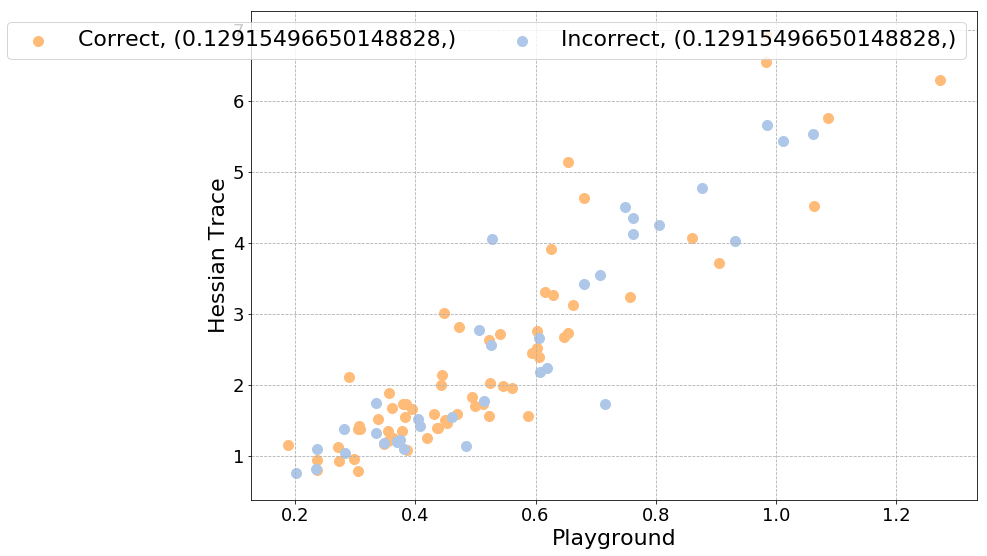

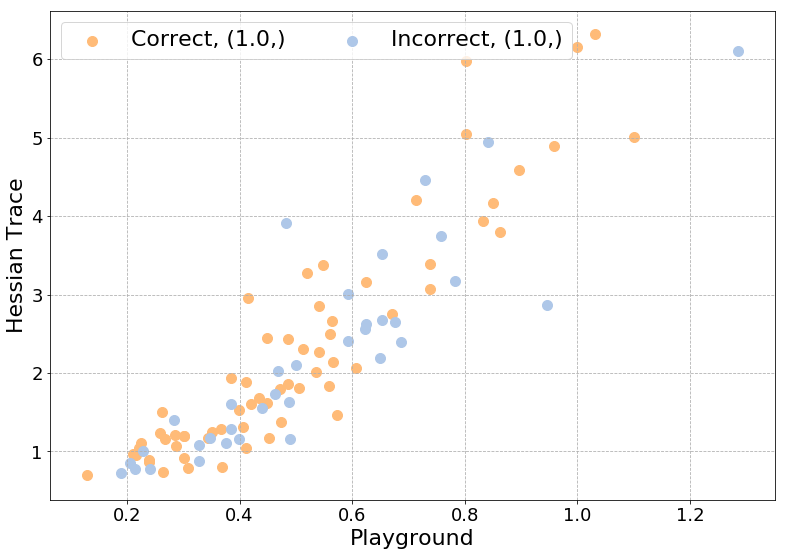

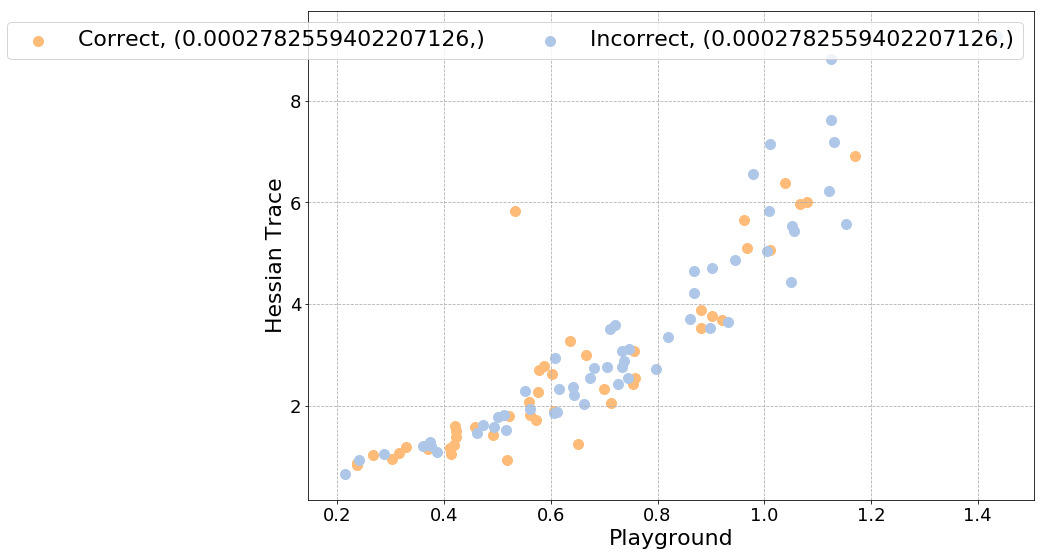

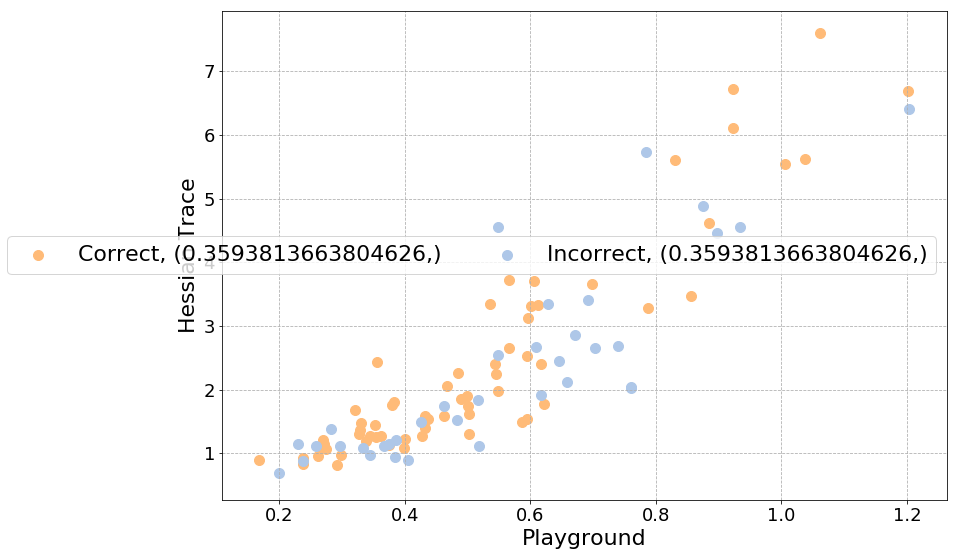

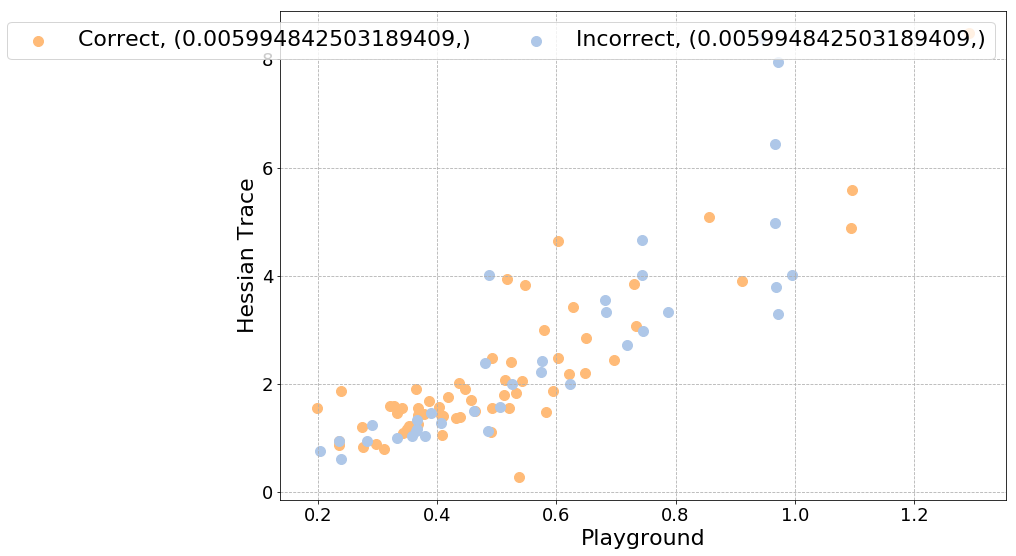

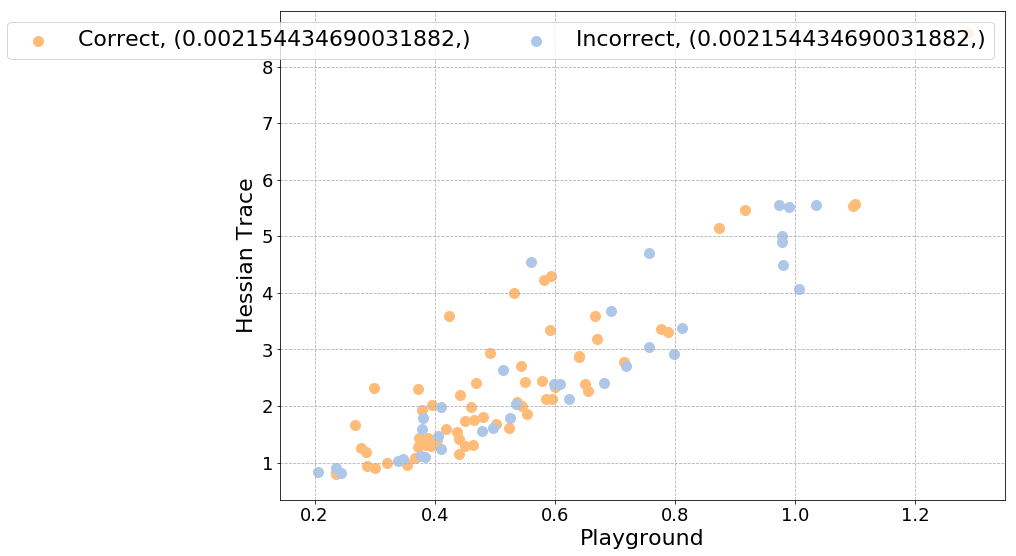

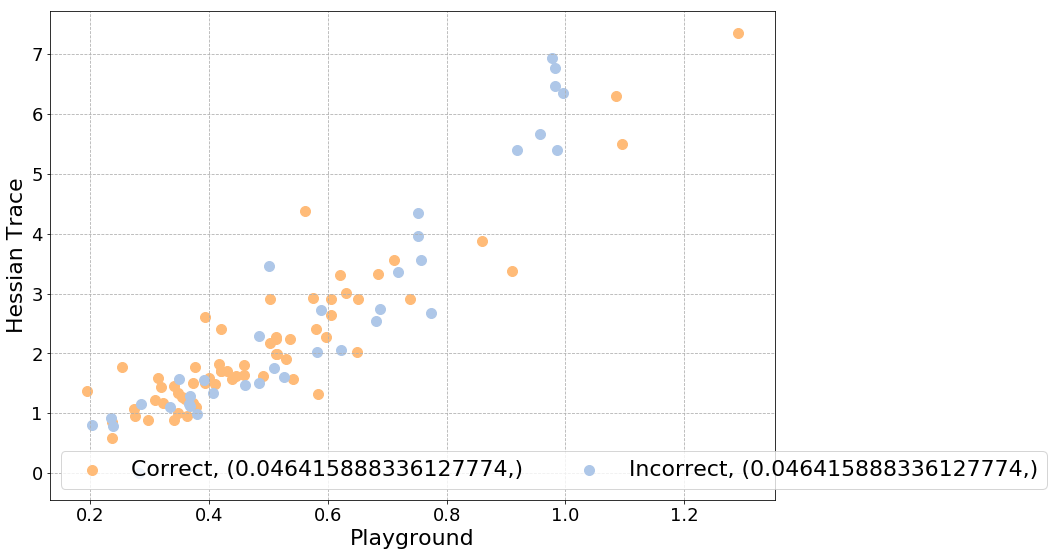

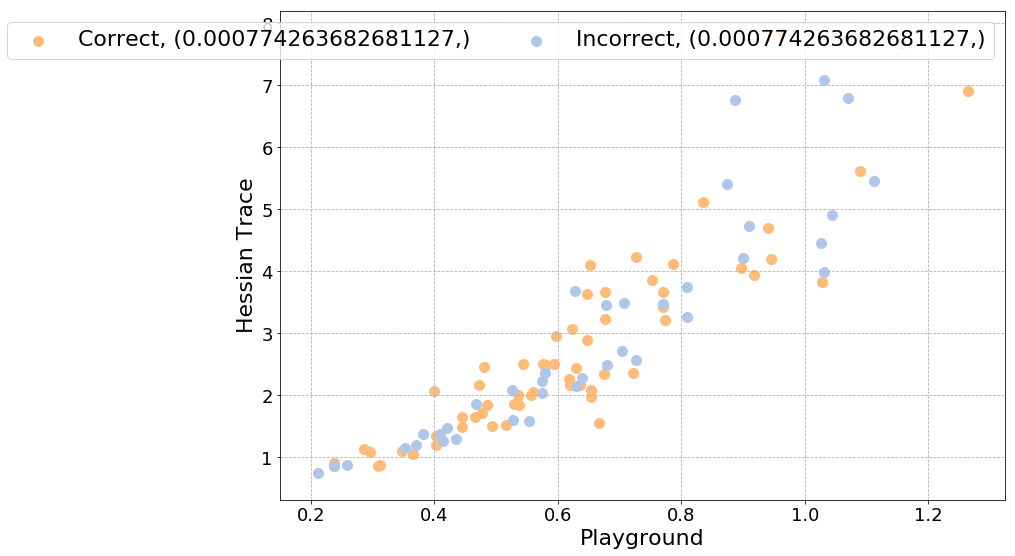

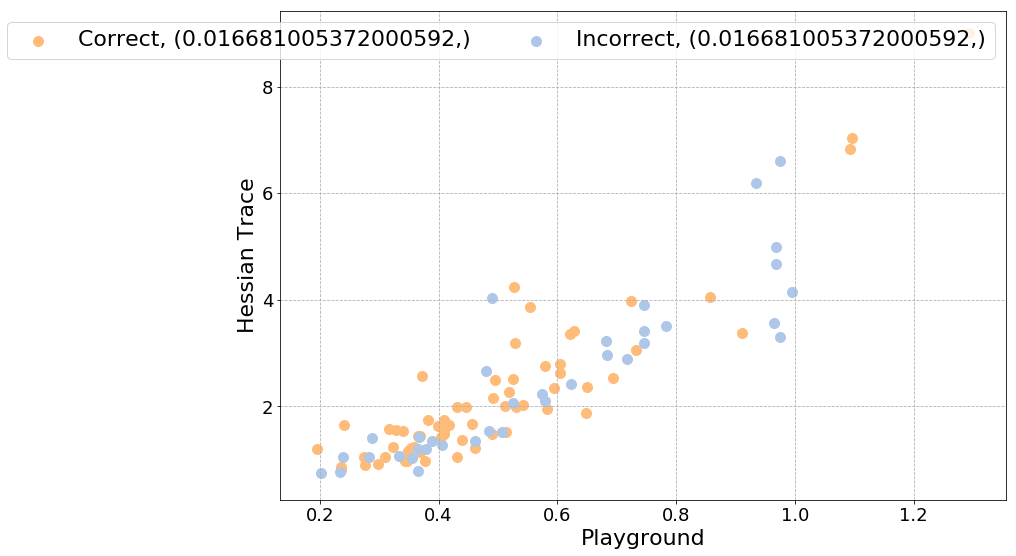

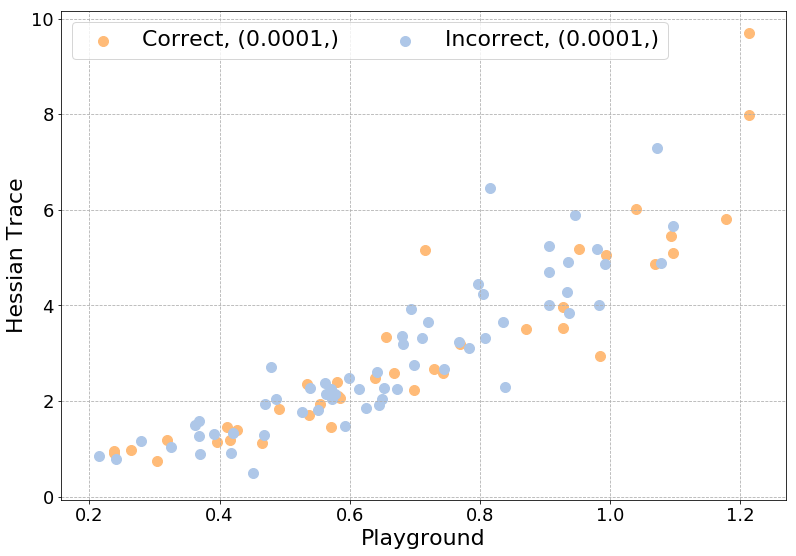

In [61]:

# Plot trace vs margins
X_axis_name = "Playground"
Y_axis_name = "Hessian Trace"

plot_name = "Correct_Incorrect"
X_axis_bounds = None
Y_axis_bounds = None

save_exp_path = None

filter_seperate = ["learning_rate"]
filter_not_seperate = None

pre_filtered_exp_ids = None

use_correct_filter = True

data_func = margin_trace_correct_incorrect_plot(playground_filters, point_traces, use_correct_filter=use_correct_filter)

hp_data_func_plot(experiment_folder, data_func, X_axis_name, Y_axis_name, 
                  plot_name, filter_seperate, filter_not_seperate,
                 save_exp_path, X_axis_bounds, Y_axis_bounds, 
                    pre_filtered_exp_ids)



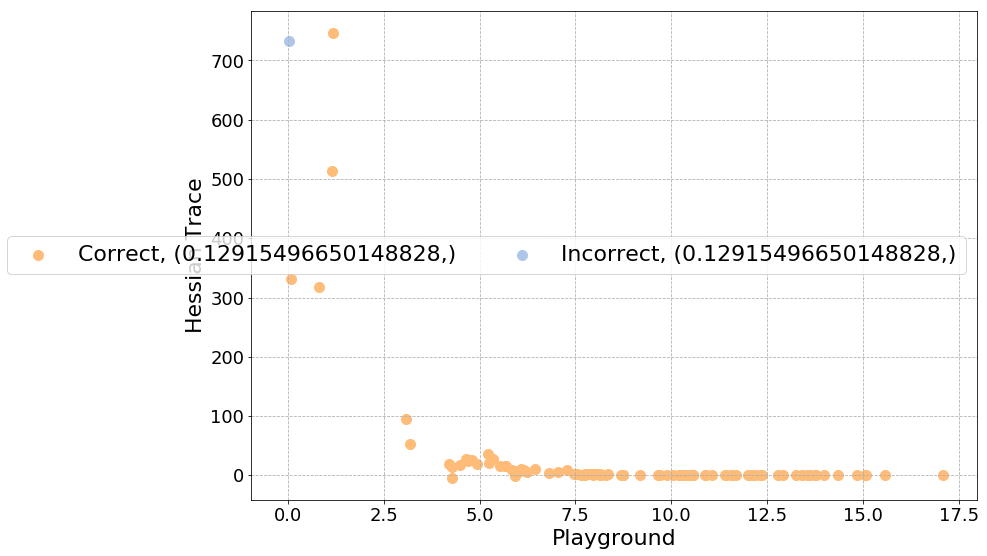

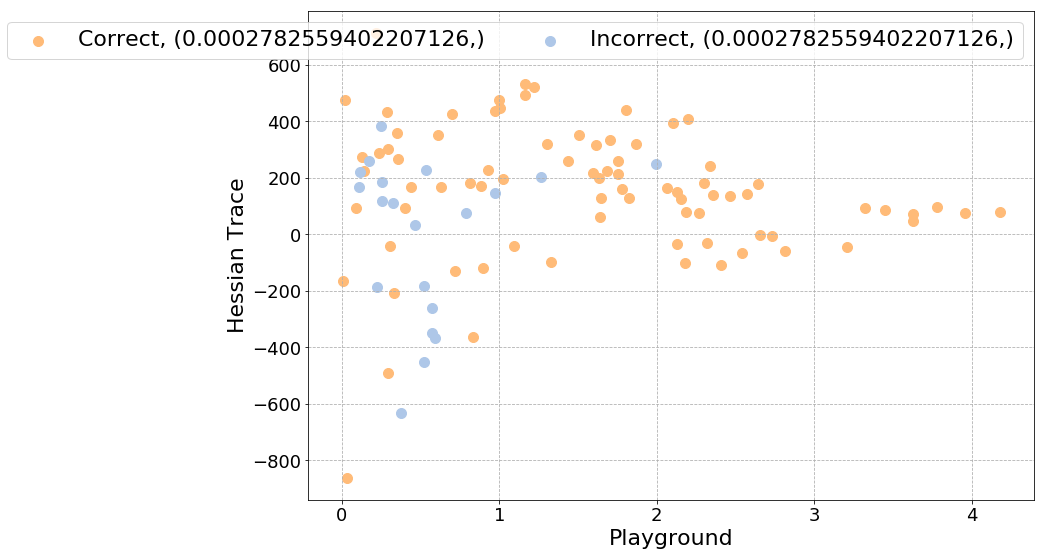

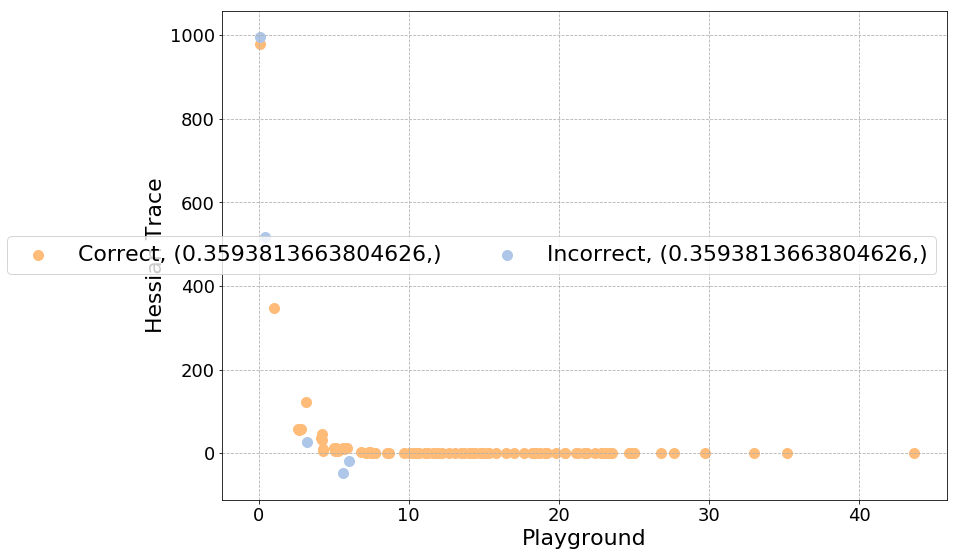

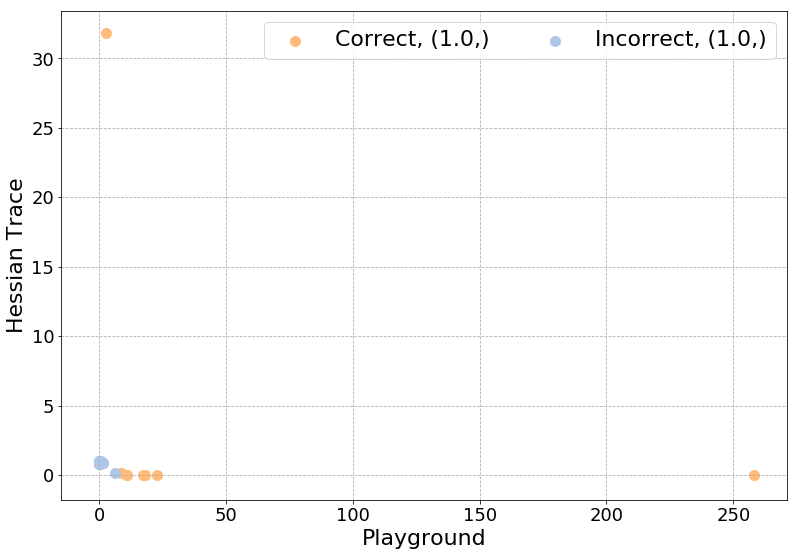

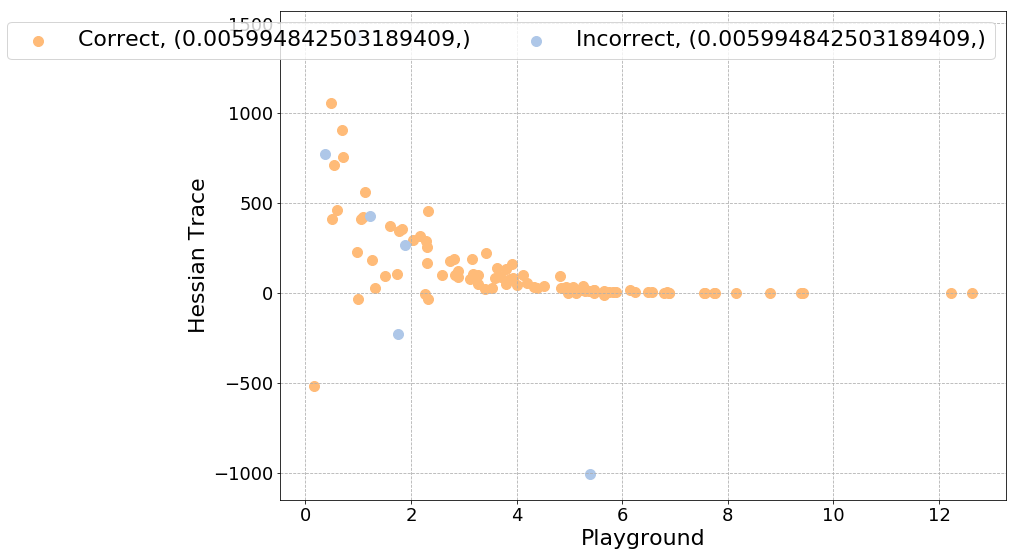

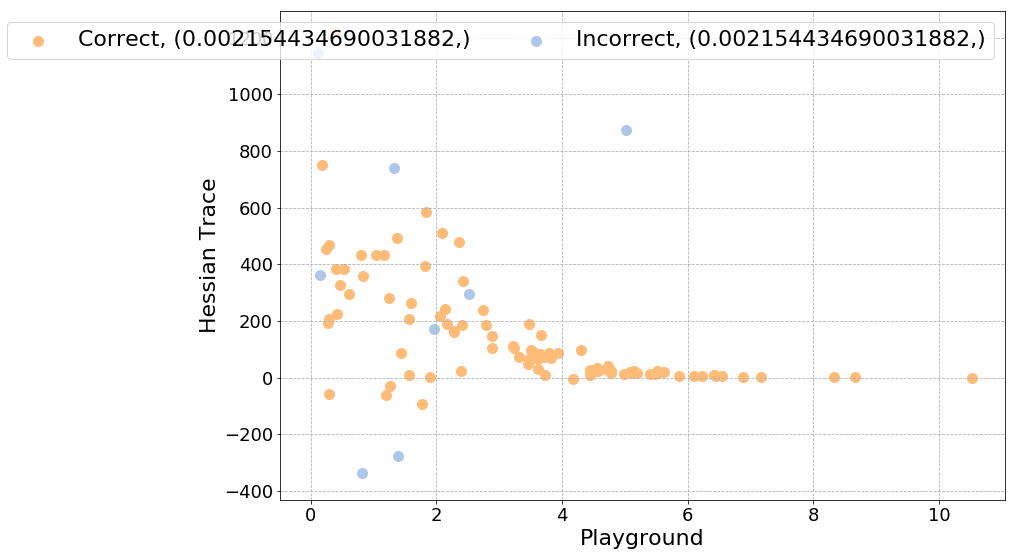

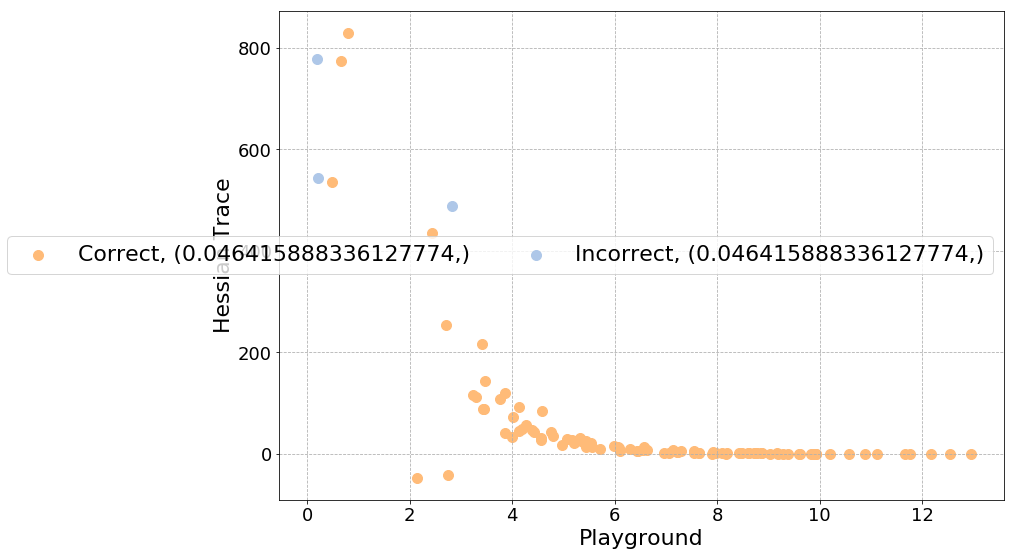

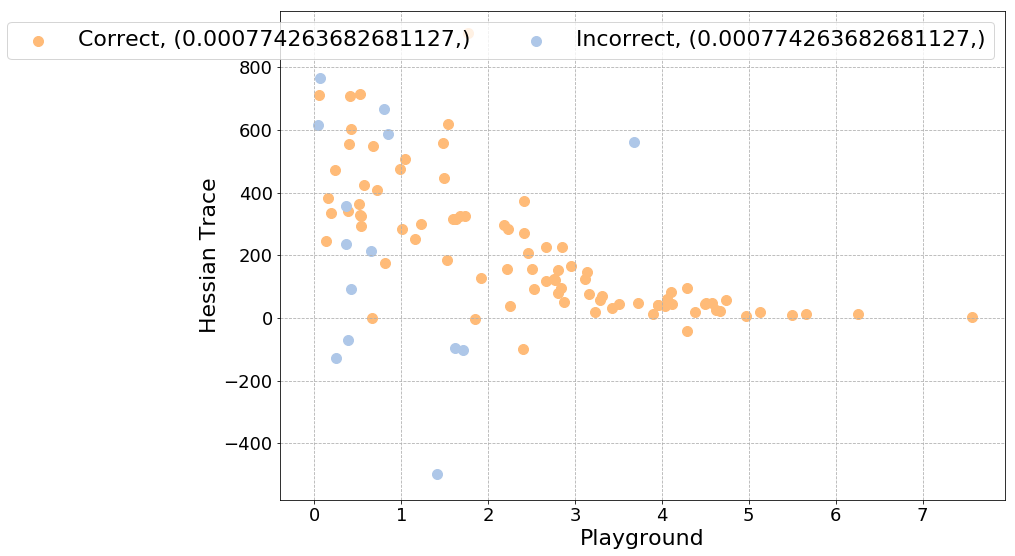

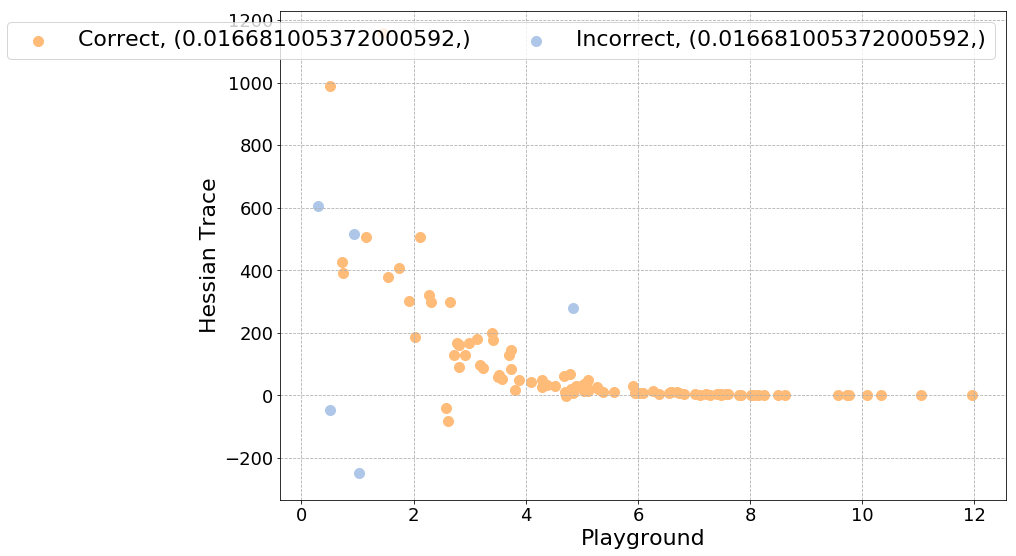

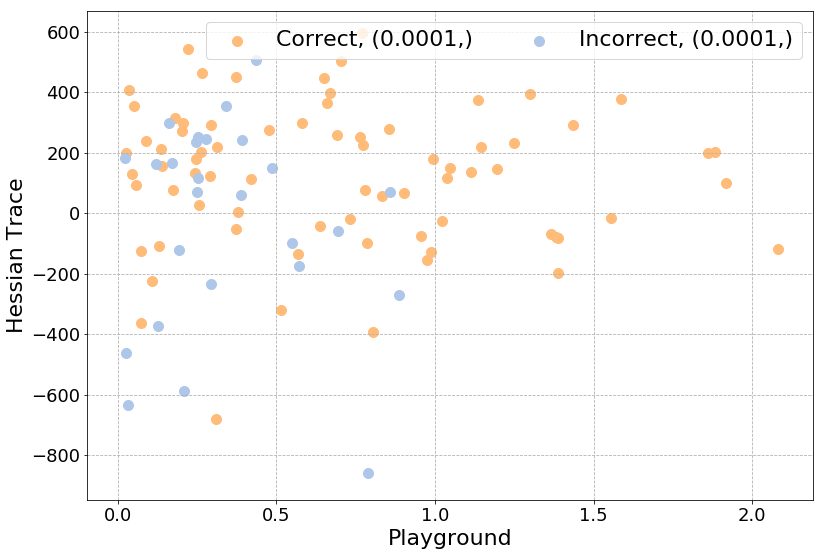

In [46]:

# Plot trace vs margins
X_axis_name = "Playground"
Y_axis_name = "Hessian Trace"

plot_name = "Correct_Incorrect"
X_axis_bounds = None
Y_axis_bounds = None

save_exp_path = None

filter_seperate = ["learning_rate"]
filter_not_seperate = None

pre_filtered_exp_ids = None

use_correct_filter = True

data_func = margin_trace_correct_incorrect_plot(margin_filters, point_traces, use_correct_filter=use_correct_filter)

hp_data_func_plot(experiment_folder, data_func, X_axis_name, Y_axis_name, 
                  plot_name, filter_seperate, filter_not_seperate,
                 save_exp_path, X_axis_bounds, Y_axis_bounds, 
                    pre_filtered_exp_ids)



# Trying to derive an analytic relation ship between margin and traces

In [ ]:
def get_exp_trace_approx(experiment_folder, step=-1, seed=0, device=None, num_datapoints=50, on_test_set=False, should_cache=False):
    traces_approx_dict = {}
    meta_dict = {"seed": seed}
    
    # get data
    train_data, test_data = get_data_from_experiment(experiment_folder)
    if on_test_set:
        data = get_random_data_subset(test_data, num_datapoints=num_datapoints, seed=seed)
    else:
        data = get_random_data_subset(train_data, num_datapoints=num_datapoints, seed=seed)


    set_seed(seed)
    # iterate through models
    for exp_name, curr_path in exp_models_path_generator(experiment_folder):

        models_dict = get_models(curr_path, step)
        traces_approx_dict[exp_name] = get_approx_trace_from_margins(models_dict, data, device=device)

        # cache data
        if should_cache:
            cache_data(experiment_folder, "traces_approx", traces_approx_dict, meta_dict)

    return traces_approx_dict



In [ ]:
def get_approx_trace_from_margins(models, data, device=None):
    output_margins_filters = get_margins_to_correct(models, data, device=device, softmax_outputs=False)
    softmax_margins_filters = get_margins_to_correct(models, data, device=device, softmax_outputs=True)

#     grad = get_models_grad(models, data, device=None)
    
    trace_approx = {}
    
    for k, m in models.items():
        output_margins, correct_filter = output_margins_filters[k]
        softmax_margins, _ = softmax_margins_filters[k]
        model_outputs_all = get_model_outputs(m, data, softmax_outputs=False, device=device)
        model_outputs, predicted = torch.max(model_outputs_all, 1)
        model_outputs = model_outputs.detach().numpy()

        
        model_norm = float(torch.norm(get_params_vec(m)))
        
        curr_trace_approx = (1 - softmax_margins) * (model_outputs/model_norm)**2
        
        trace_approx[k] = (curr_trace_approx, correct_filter)
    return trace_approx

In [ ]:
trace_approx_filters = get_exp_trace_approx(experiment_folder, step=-1, seed=0, device=None, num_datapoints=100, on_test_set=False, should_cache=False)
trace_approx = {k1: {k2: v2[0] for k2, v2 in v1.items()} for k1, v1 in trace_approx_filters.items()}


In [ ]:
f = trace_approx_filters["1594673313.8724134"]["1"][1]
plt.scatter(np.array(eig_density_traces["1594673313.8724134"]["1"])[f], trace_approx["1594673313.8724134"]["1"][f])
plt.xlim(-0.00001, 0.0002)
plt.ylim(-0.00001, 0.0002)